In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../input/students-performance-in-exams/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Text(0.5, 1.0, 'Compare of Male and Female')

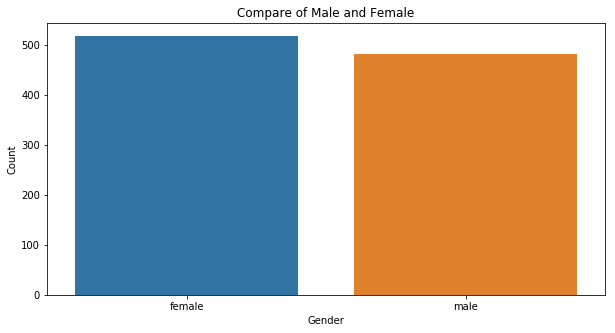

In [3]:
plt.figure(figsize=(10,5))
sns.countplot(df['gender'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Compare of Male and Female")


In [4]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

Text(0, 0.5, 'Count')

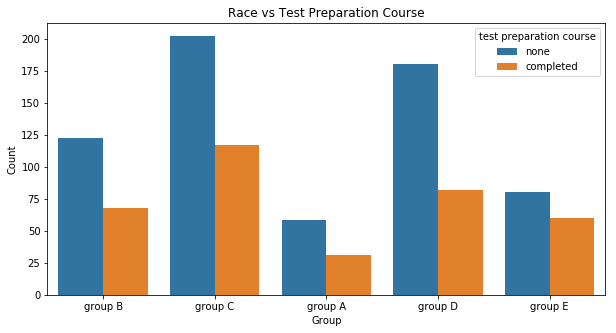

In [5]:
plt.figure(figsize=(10,5))
plt.title("Race vs Test Preparation Course")
sns.countplot(df['race/ethnicity'],hue=df['test preparation course'])
plt.xlabel("Group")
plt.ylabel("Count")

Text(0.5, 1.0, 'Comperation of Standard and Free Lunch')

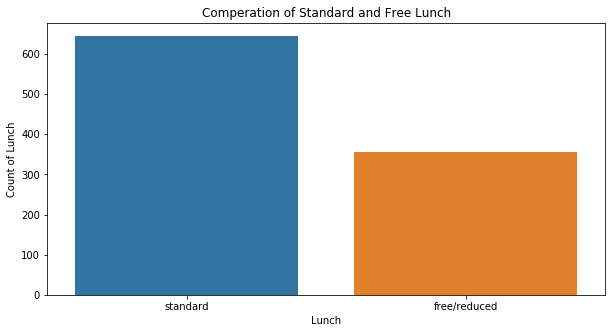

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(df['lunch'])
plt.xlabel("Lunch")
plt.ylabel("Count of Lunch")
plt.title("Comperation of Standard and Free Lunch")

Text(0.5, 1.0, 'Comperation of Parent Education')

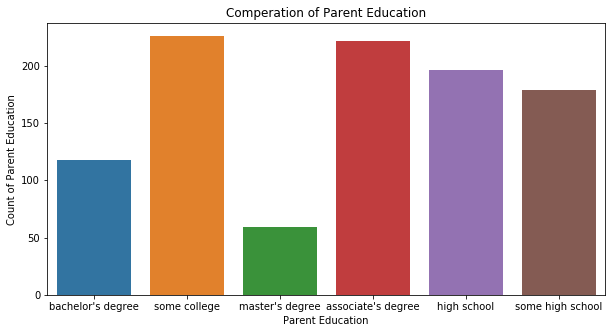

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(df['parental level of education'])
plt.xlabel("Parent Education")
plt.ylabel("Count of Parent Education")
plt.title("Comperation of Parent Education")

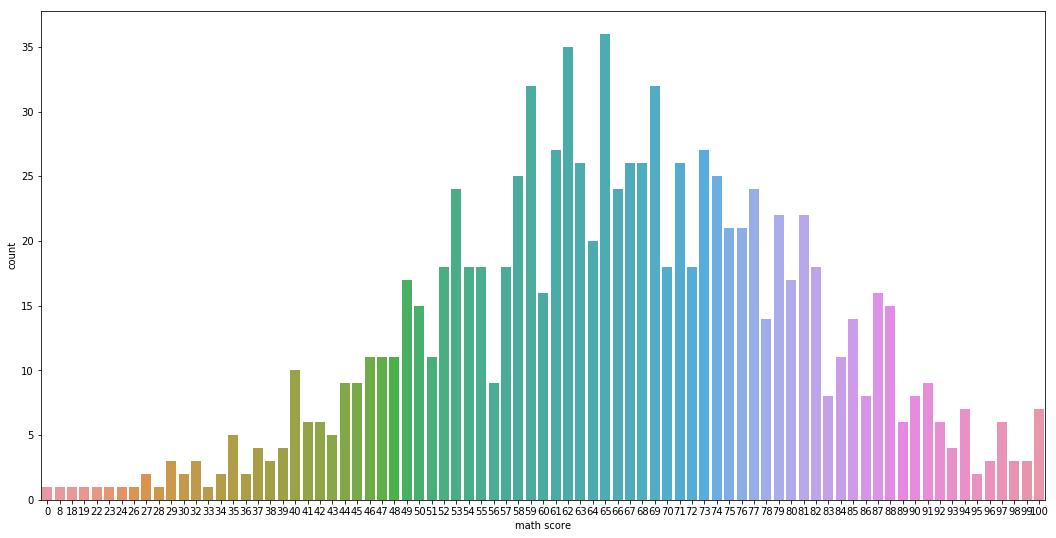

In [8]:
plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('tableau-colorblind10')
sns.countplot(df['math score'])

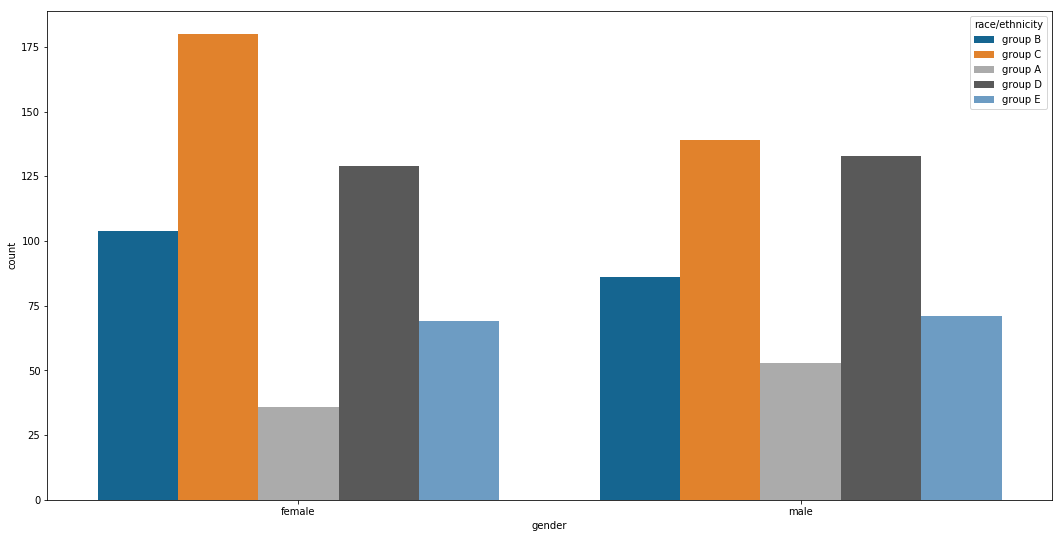

In [9]:
sns.countplot(df['gender'],hue=df['race/ethnicity'])

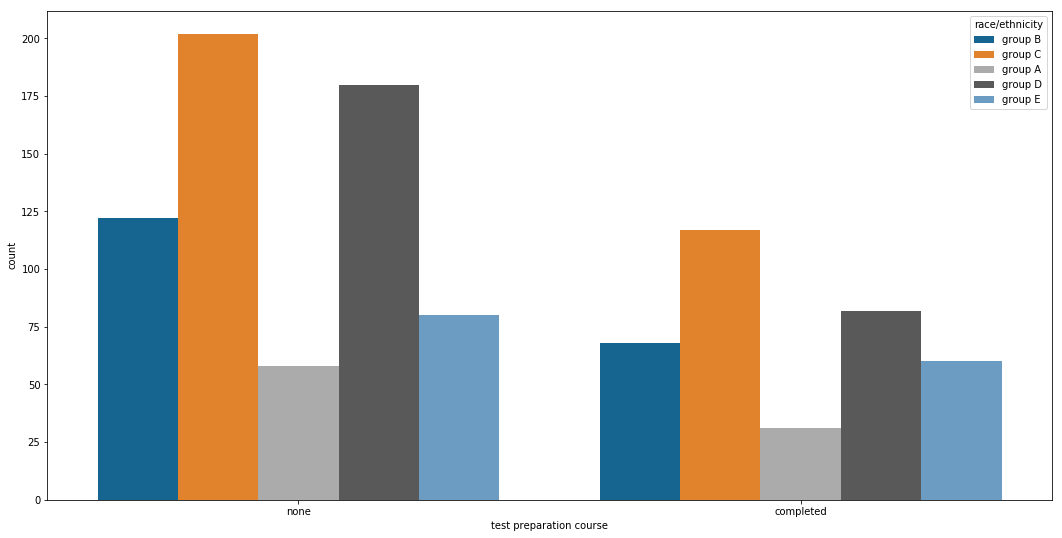

In [10]:
sns.countplot(df['test preparation course'],hue=df['race/ethnicity'])

Text(0.5, 1.0, 'Pass/Fail in Math')

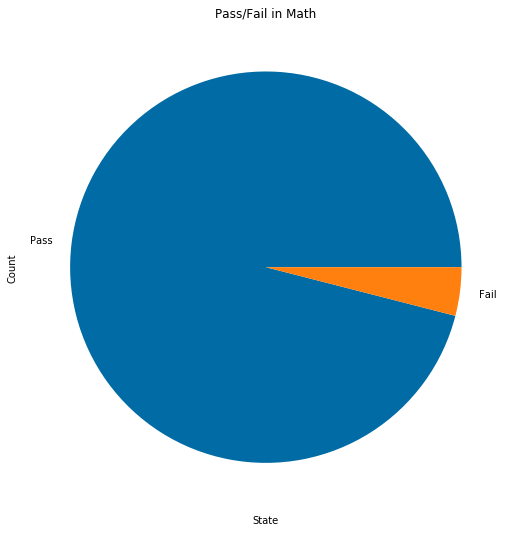

In [11]:
df['mathpass'] = np.where(df['math score']<40,'Fail','Pass')
df['mathpass'].value_counts().plot.pie()
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Pass/Fail in Math")

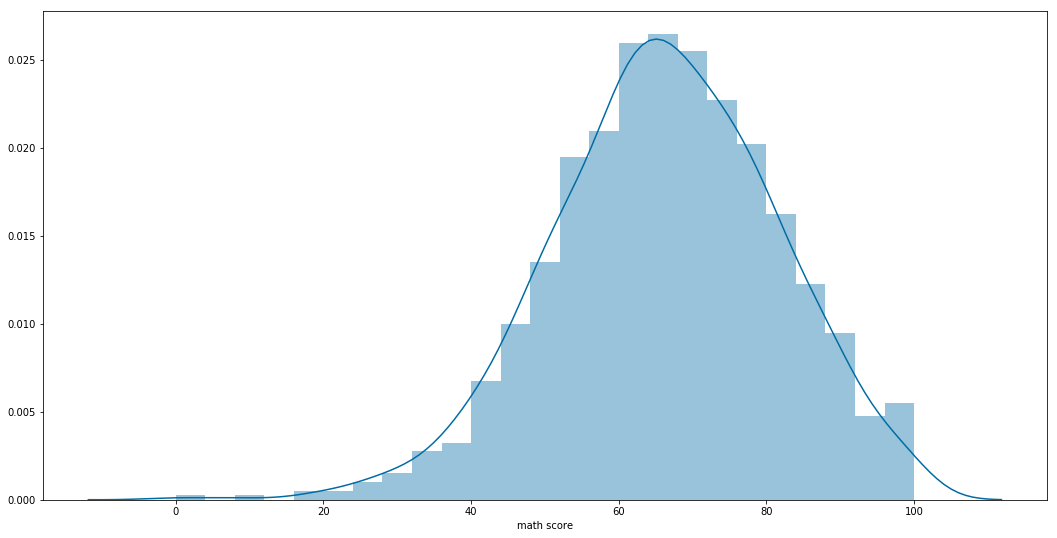

In [12]:
sns.distplot(df['math score'])

Text(0.5, 1.0, 'Pass/Fail in Reading')

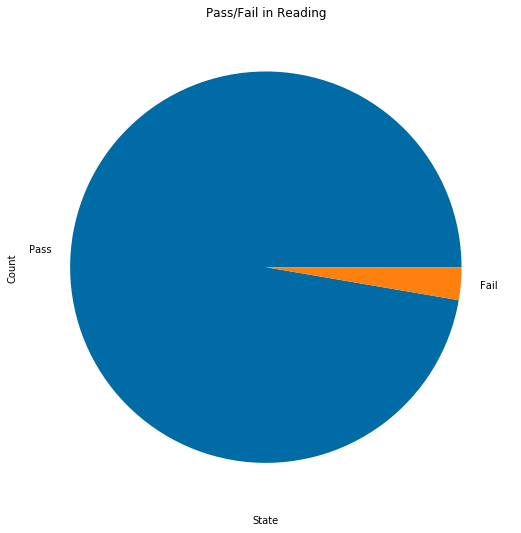

In [13]:
df['readingpass'] = np.where(df['reading score']>40,'Pass','Fail')
df['readingpass'].value_counts().plot.pie()
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Pass/Fail in Reading")

Text(0.5, 1.0, 'Pass/Fail in Writing')

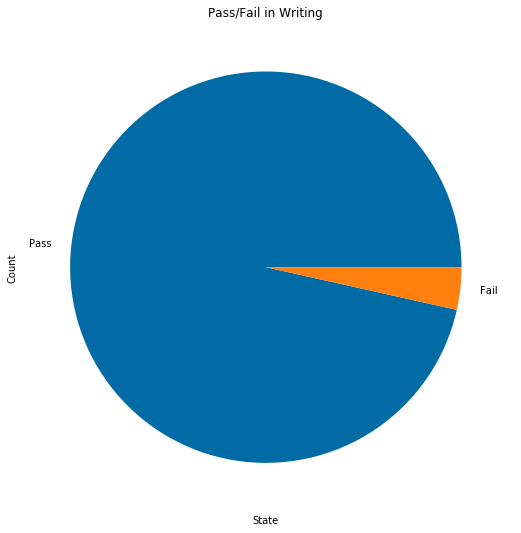

In [14]:
df['writingpass'] = np.where(df['writing score']>40,'Pass','Fail')
df['writingpass'].value_counts().plot.pie()
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Pass/Fail in Writing")

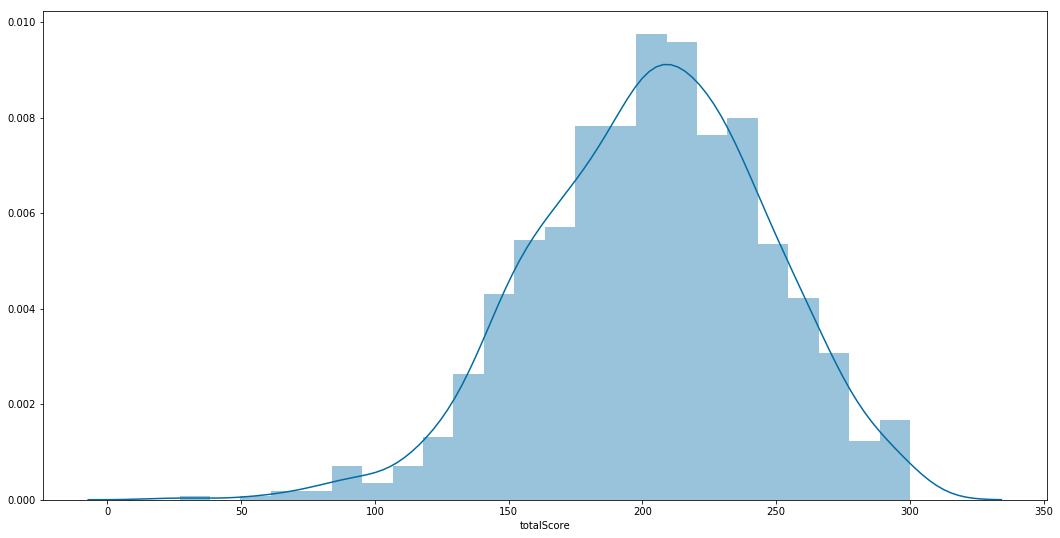

In [15]:
df['totalScore'] = df['math score']+df['reading score']+df['writing score']
sns.distplot(df['totalScore'])

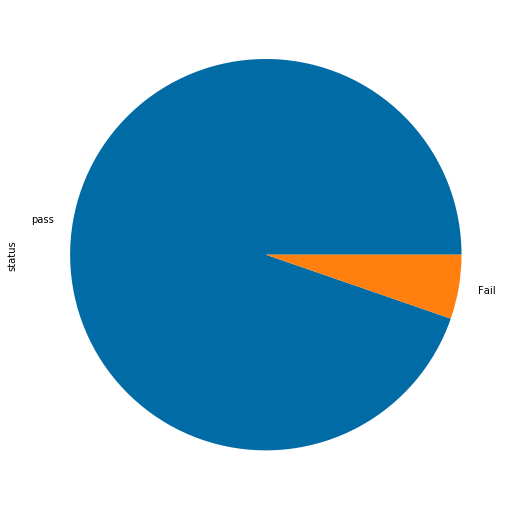

In [16]:
df['status'] = df.apply(lambda x : 'Fail' if x['mathpass'] == 'Fail' or 
                           x['readingpass'] == 'Fail' or x['writingpass'] == 'Fail'
                           else 'pass', axis = 1)
df['status'].value_counts().plot.pie()

In [17]:
from math import ceil
df['percentage'] = df['totalScore']/3

for i in range(0, 1000):
    df['percentage'][i] = ceil(df['percentage'][i])

In [18]:
df[['percentage','totalScore']]

,percentage,totalScore
0,73.0,218
1,83.0,247
2,93.0,278
3,50.0,148
4,77.0,229
...,...,...
995,94.0,282
996,58.0,172
997,65.0,195
998,75.0,223


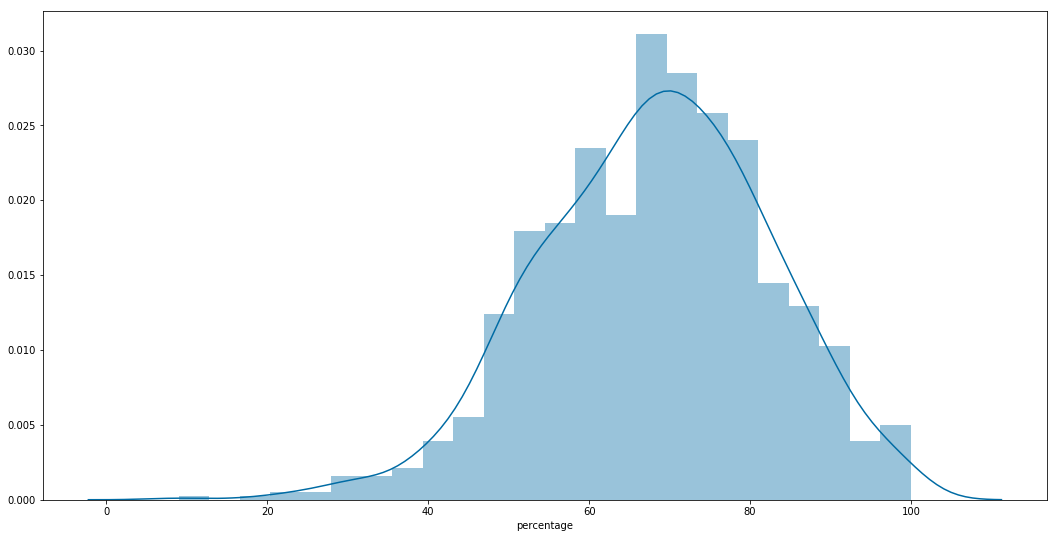

In [19]:
sns.distplot(df['percentage'])

In [20]:
def grade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

df['grades'] = df.apply(lambda x: grade(x['percentage'], x['status']), axis = 1 )

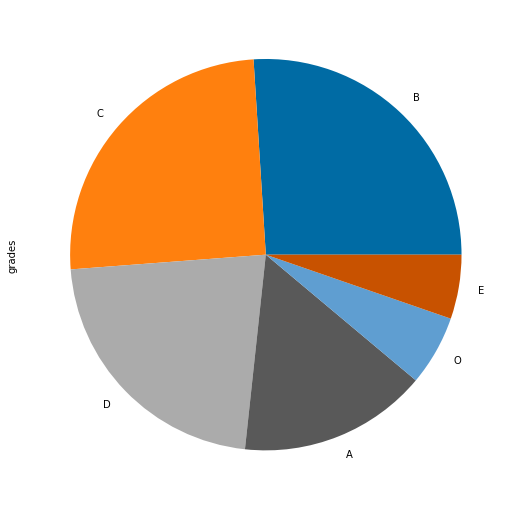

In [21]:
df['grades'].value_counts().plot.pie()

Text(0.5, 1.0, 'Parent Education VS Student Grade')

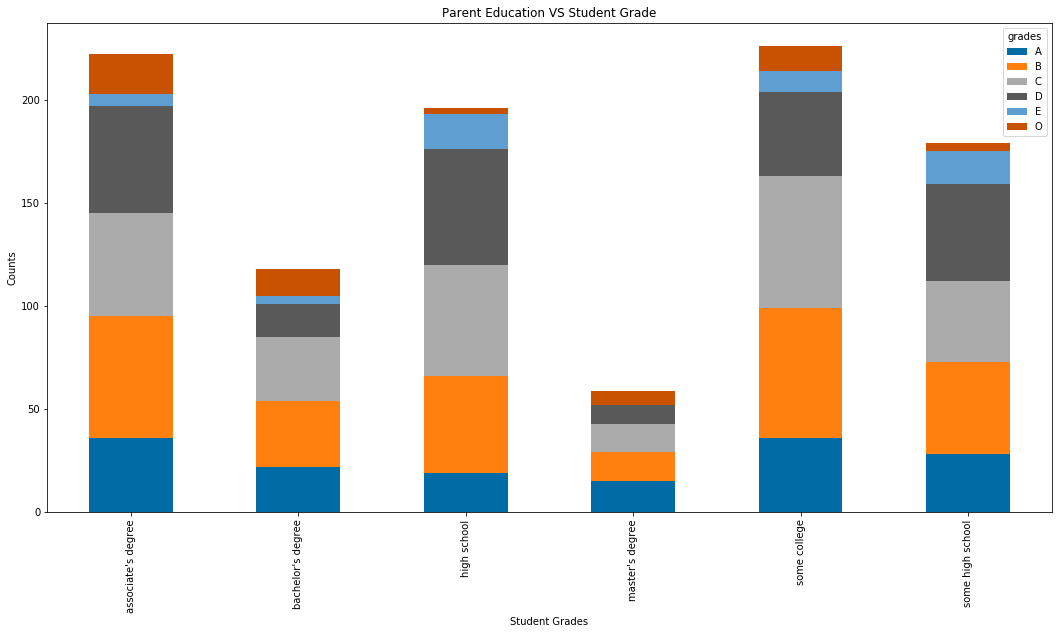

In [22]:
pd.crosstab(df['parental level of education'],df['grades']).plot.bar(stacked=True)
plt.xlabel("Student Grades")
plt.ylabel("Counts")
plt.title("Parent Education VS Student Grade")

Text(0.5, 1.0, 'Grades VS Gender')

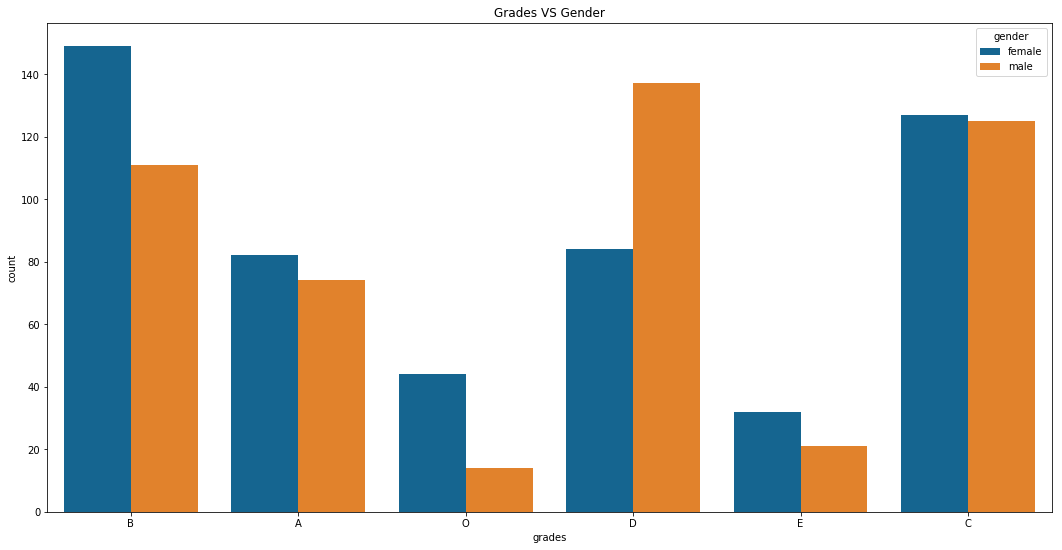

In [23]:
sns.countplot(df['grades'],hue=df['gender'])
plt.title("Grades VS Gender")

In [24]:
from sklearn.preprocessing import LabelEncoder
ln = LabelEncoder()
object_columns = df.select_dtypes('object').columns
for i in object_columns:
    df[i] = ln.fit_transform(df[i])

In [25]:
X  = df.drop('percentage',axis=1)
y = df['percentage']

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 45)

In [27]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,r2_score

In [28]:
log = LinearRegression()
log.fit(x_train,y_train)
y_predict = log.predict(x_test)
r2_score(y_predict,y_test)

0.9995745996373515

In [29]:
log = LogisticRegression()
log.fit(x_train,y_train)
y_predict = log.predict(x_test)
accuracy_score(y_predict,y_test)

0.084

In [30]:
log = DecisionTreeClassifier()
log.fit(x_train,y_train)
y_predict = log.predict(x_test)
accuracy_score(y_predict,y_test)

0.98